In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
chratetemp = ctrl.Antecedent(np.arange(0, 11, 1), 'temperature')
chratehumi = ctrl.Antecedent(np.arange(0, 21, 1), 'humidity')
result = ctrl.Consequent(np.arange(0, 101, 1), 'result', defuzzify_method='centroid')
chratetemp['low'] = fuzz.trimf(chratetemp.universe, [0, 0, 5])
chratetemp['mid'] = fuzz.trimf(chratetemp.universe, [0, 5, 10])
chratetemp['high'] = fuzz.trimf(chratetemp.universe, [5, 10, 10])
chratehumi['low'] = fuzz.trimf(chratehumi.universe, [0, 0, 10])
chratehumi['mid'] = fuzz.trimf(chratehumi.universe, [0, 10, 20])
chratehumi['high'] = fuzz.trimf(chratehumi.universe, [10, 20, 20])
result['low'] = fuzz.trimf(result.universe, [0, 0, 50])
result['mid'] = fuzz.trimf(result.universe, [0, 50, 100])
result['high'] = fuzz.trimf(result.universe, [50, 100, 100])

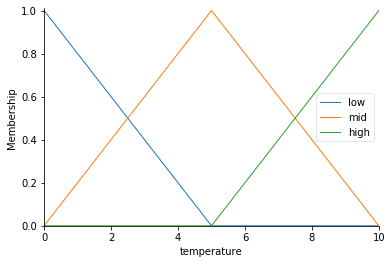

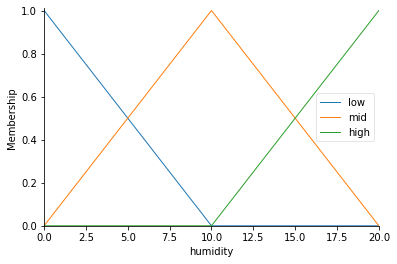

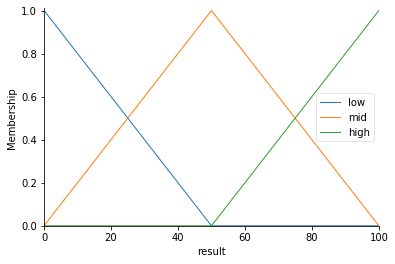

In [4]:
chratetemp.view()
chratehumi.view()
result.view()

In [7]:
rule1 = ctrl.Rule(chratetemp['low'] | chratehumi['low'], result['low'])
rule2 = ctrl.Rule(chratetemp['mid'] | chratehumi['mid'], result['mid'])
rule3 = ctrl.Rule(chratetemp['high'] | chratehumi['high'], result['high'])
#rule4 = ctrl.Rule(chratetemp['mid'] & chratehumi['low'], result['mid'])
#rule5 = ctrl.Rule(chratetemp['mid'] & chratehumi['mid'], result['mid'])
#rule6 = ctrl.Rule(chratetemp['mid'] & chratehumi['high'], result['mid'])
#rule7 = ctrl.Rule(chratetemp['high'] & chratehumi['low'], result['high'])
#rule8 = ctrl.Rule(chratetemp['high'] & chratehumi['mid'], result['high'])
#rule9 = ctrl.Rule(chratetemp['high'] & chratehumi['high'], result['high'])

C:\Users\DELL\Anaconda3\envs\project1\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\DELL\Anaconda3\envs\project1\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x184dc683e48>)

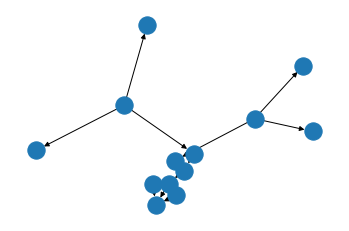

In [8]:
rule1.view()

In [15]:
resulting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
resulting = ctrl.ControlSystemSimulation(resulting_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
resulting.input['chratetemp'] = 4
resulting.input['chratehumi'] = 22
# Crunch the numbers
resulting.compute()


ValueError: Unexpected input: chratetemp

In [13]:
print(resulting.output['result'])
result.view(sim=resulting)

KeyError: 'result'